
Test Point Classifications:
Point (-20, -40): Sea
Point (20, 75): Sea
Point (50, 50): Sea
Point (-30, 160): Sea
Point (80, -170): Sea
Point (-55, 150): Sea
Point (-25, -60): Sea
Point (35, 80): Sea
Point (10, 35): Sea
Point (65, 15): Sea
Point (-5, 150): Sea
Point (90, 180): Sea
Point (-90, -180): Sea
Point (0, 0): Sea
Point (30, -100): Sea
Point (-40, 120): Sea


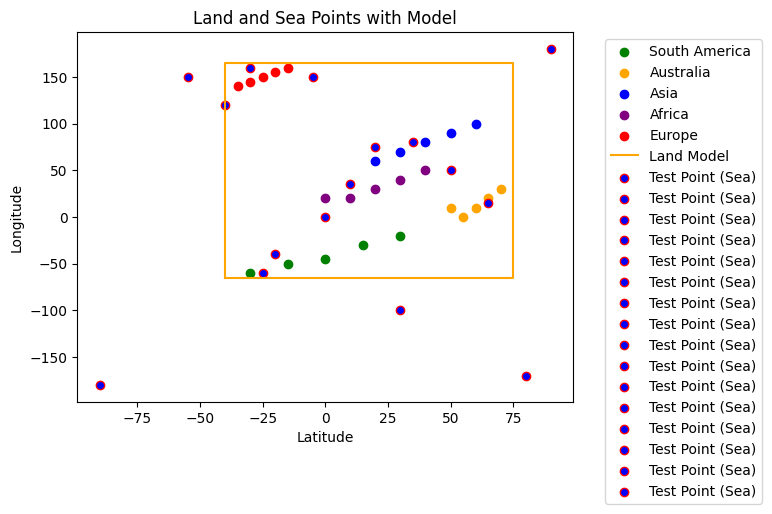

In [ ]:
# Importing necessary libraries for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Defining known land mass points for each continent
# These points represent locations on different continents.
land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

# Creating a grid of points for the whole world to classify as land or sea
# Latitude ranges from -90 to 90, and longitude from -180 to 180, with steps of 10.
grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]

# This function calculates the prior probability of a point being land or sea
# based on the ratio of land points to total points.
def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land
    return P_land, P_sea

# This function calculates the likelihood of each grid point being land based on
# the distance to the nearest land point. The closer the point, the higher the likelihood.
def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    all_land_points = [point for points in land_points.values() for point in points]

    # For each grid point, calculate its distance to the nearest land point
    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        # Likelihood decays exponentially with distance
        likelihoods_land[point] = np.exp(-distances_to_land)

    return likelihoods_land

# This function classifies a point as 'Land' or 'Sea' based on its likelihood
# of being land. If the likelihood exceeds the threshold, it is classified as 'Land'.
def classify_point(point, likelihoods_land, likelihood_threshold):
    if likelihoods_land.get(point, 0) > likelihood_threshold:
        return 'Land'
    return 'Sea'

# Function to plot the known land points, test points, and the classification results.
def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()

    # Colors assigned for each continent for better visualization
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot the land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Highlight the bounding box for the land model (just for visualization)
    x_min, x_max, y_min, y_max = box_bounds
    land_model_x = [x_min, x_max, x_max, x_min, x_min]
    land_model_y = [y_min, y_min, y_max, y_max, y_min]
    ax.plot(land_model_x, land_model_y, color='orange', label='Land Model')

    # Plot the test points and classify them as 'Land' or 'Sea' based on color
    for point, classification in zip(test_points, test_classifications):
        color = 'green' if classification == 'Land' else 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='red', label=f'Test Point ({classification})')

    # Legend is placed outside the plot area for better readability
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land and Sea Points with Model')
    plt.grid(False)
    plt.show()

# Main block of code to execute the classification and plotting
total_points = len(grid_points)

# Step 1: Calculate prior probabilities for land and sea based on the number of land points
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Step 2: Calculate the likelihoods for each grid point based on proximity to land masses
likelihoods_land = calculate_likelihoods(grid_points, land_points)

# Step 3: Define the bounding box for visualization purposes
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)

# Test points near different regions of the world (some near land, some far from it)
test_points = [
    (-20, -40), (20, 75), (50, 50), (-30, 160), (80, -170), (-55, 150),
    (-25, -60), (35, 80), (10, 35), (65, 15), (-5, 150),
    (90, 180), (-90, -180), (0, 0), (30, -100), (-40, 120)
]

# Step 4: Define a threshold for likelihood (e.g., 0.5) and classify the test points
likelihood_threshold = 0.5
test_classifications = [classify_point(point, likelihoods_land, likelihood_threshold) for point in test_points]

# Print the classification results for each test point
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Step 5: Plot the land points, test points, and the classifications
plot_points(land_points, test_points, test_classifications, box_bounds)

